In [4]:
import investpy

In [100]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Stocks

## Stocks lists
The stock lists come from a pre-made CSV provided with the Python package. The CSV actually contains more information and provides the ids to use when the data is scraped from investing.com. As this means the stock list is pre-determined, this also means the data is only updated with the package. 

Data can be retrieved as:
1. A list of symbols
2. A dataframe, including symbols, names, isin etc
3. A dictionary alternative of the dataframe

In [68]:
# Retrieve all the available stocks as a Python list
stocks = investpy.get_stocks_list()
stocks[:10]

['TS', 'APBR', 'GGAL', 'TXAR', 'PAMP', 'TECO2', 'BPAT', 'ALUA', 'BBAR', 'BMA']

In [70]:
# Retrieve data frame of stocks
stocks_df = investpy.get_stocks()
stocks_df.head(10)

,country,name,full_name,isin,currency,symbol
0,argentina,Tenaris,Tenaris,LU0156801721,ARS,TS
1,argentina,PETROBRAS ON,Petroleo Brasileiro - Petrobras,BRPETRACNOR9,ARS,APBR
2,argentina,Grupo Financiero Galicia,Grupo Financiero Galicia B,ARP495251018,ARS,GGAL
3,argentina,Ternium Argentina,Ternium Argentina SA,ARSIDE010029,ARS,TXAR
4,argentina,Pampa Energia,Pampa Energia SA,ARP432631215,ARS,PAMP
5,argentina,Telecom Argentina,Telecom Argentina,ARP9028N1016,ARS,TECO2
6,argentina,Banco Patagonia,Banco Patagonia,ARMERI013163,ARS,BPAT
7,argentina,Aluar,Aluar Aluminio Argentino,ARALUA010258,ARS,ALUA
8,argentina,BBVA Banco Frances,BBVA Banco Frances SA,ARP125991090,ARS,BBAR
9,argentina,Banco Macro,Banco Macro,ARBANS010010,ARS,BMA


In [75]:
# Retrieve stocks as dictionary
stocks_dct = investpy.get_stocks_dict()
stocks_dct[:3]

[{'country': 'argentina',
  'name': 'Tenaris',
  'full_name': 'Tenaris',
  'isin': 'LU0156801721',
  'currency': 'ARS',
  'symbol': 'TS'},
 {'country': 'argentina',
  'name': 'PETROBRAS ON',
  'full_name': 'Petroleo Brasileiro - Petrobras',
  'isin': 'BRPETRACNOR9',
  'currency': 'ARS',
  'symbol': 'APBR'},
 {'country': 'argentina',
  'name': 'Grupo Financiero Galicia',
  'full_name': 'Grupo Financiero Galicia B',
  'isin': 'ARP495251018',
  'currency': 'ARS',
  'symbol': 'GGAL'}]

## Stocks countries
A list of stock countries can also be extracted. This data is hard-coded in a separate Python script (within Utils)

In [77]:
# Retrieve list of available stock countries
stock_countries = investpy.get_stock_countries()
stock_countries[:10]

['argentina',
 'brazil',
 'canada',
 'chile',
 'colombia',
 'costa rica',
 'jamaica',
 'mexico',
 'peru',
 'united states']

Retrieval of data proceeds by checking the lists within the library rather than pinging investing.com to find out whether or not the stock actually exists. If the stock is not available within the library it will throw an error. The downside to this is the lack of ability to get 

## Historical stock data
Stock data here will not contain ETFs or funds. In order to search for stock data the stock symbol and country are mandatory requirements.

The following data is available: **Date, Open, High, Low, Close, Volume, Currency**

Data does not go back as far as the stock inception. In the case of Next, Google has the price go as far back as 1988. In this case the data only goes back to 2009.

In [79]:
# Retrieve the recent historical data (past month) of a stock as a pandas.DataFrame on ascending date order
df = investpy.get_stock_recent_data(stock='NXT', country='United Kingdom', as_json=False, order='ascending')
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-12-21,6606.0,6610.0,6388.0,6594.0,243937,GBP
2020-12-22,6586.0,6721.1,6556.0,6678.0,118118,GBP
2020-12-23,6622.0,6934.0,6616.0,6934.0,271421,GBP
2020-12-24,6972.0,7130.0,6928.0,6928.0,246408,GBP
2020-12-29,7000.0,7236.0,6992.0,7234.0,370280,GBP
2020-12-30,7202.0,7254.0,7146.5,7164.0,215976,GBP
2020-12-31,7072.0,7222.0,7050.0,7086.0,246185,GBP
2021-01-04,7254.0,7254.0,6902.4,6912.0,326573,GBP
2021-01-05,7324.0,7572.0,7259.4,7468.0,526445,GBP


In [81]:
# Retrieve historical data given the date range
df = investpy.get_stock_historical_data(
    'NXT', country='United Kingdom', 
    from_date='01/01/1990', to_date='21/01/2020', 
    as_json=False, order='ascending'
)

<AxesSubplot:xlabel='Date'>

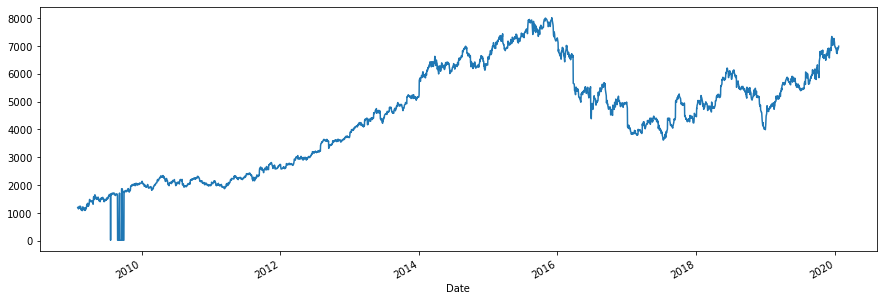

In [101]:
# Plot data based on historical data
plt.figure(figsize=(15, 5))
df.Close.plot()

In [102]:
# A handful of prices which are evidentally incorrect, late 2009
df[df.Close < 1000]

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2009-07-22,16.2,16.8,16.1,16.7,0,GBP
2009-08-28,16.5,16.6,16.3,16.5,0,GBP
2009-08-31,16.5,16.5,16.5,16.5,0,GBP
2009-09-01,16.5,16.5,16.0,16.2,0,GBP
2009-09-02,16.5,16.5,16.1,16.5,0,GBP
2009-09-03,16.5,16.6,16.3,16.4,0,GBP
2009-09-04,16.4,16.6,16.2,16.5,0,GBP
2009-09-08,17.3,17.6,17.1,17.4,0,GBP
2009-09-09,17.5,17.5,17.3,17.5,0,GBP


## Stock dividends
It is also possible to extract the dividend payments for a stock (excludes ETFs). 
- Date: Ex-dividend date*
- Dividend: Amount of dividend in terms of stock price*
- Type: How the dividend is paid (monthly, quarterly, semi_annual, annual, trailing_twelve_months)
- Payment Date: Date the dividend is actually paid
- Yield: Percentage of the dividend amount as percentage of stock price*


In [107]:
stock_dividends = investpy.get_stock_dividends('NXT', 'United Kingdom')
stock_dividends

,Date,Dividend,Type,Payment Date,Yield
0,2019-12-05,57.500,trailing_twelve_months,2020-01-02,0.94%
1,2019-07-04,165.000,trailing_twelve_months,2019-08-01,2.69%
2,2018-12-06,160.000,trailing_twelve_months,2019-01-02,3.01%
3,2018-07-05,158.000,trailing_twelve_months,2018-08-01,3.04%
4,2018-01-04,158.000,trailing_twelve_months,2018-01-25,3.41%
5,2017-12-07,158.000,trailing_twelve_months,2018-01-02,3.48%
6,2017-10-05,158.000,trailing_twelve_months,2017-11-01,3.24%
7,2017-07-06,158.000,trailing_twelve_months,2017-08-01,3.98%
8,2017-04-06,158.000,trailing_twelve_months,2017-05-02,3.70%
9,2016-12-08,158.000,trailing_twelve_months,2017-01-03,4.09%


## Stock information

In [106]:
# Retrieve company profile
company_profile = investpy.get_stock_company_profile(stock='nxt', country='United Kingdom', language='english')
company_profile

{'url': 'https://www.investing.com/equities/next-company-profile',
 'desc': "NEXT plc is a United Kingdom-based retailer offering clothing, footwear, accessories, beauty and home products. The Company’s segments include NEXT Online, NEXT Retail, NEXT Finance, NEXT International Retail, NEXT Sourcing and other. NEXT Online is its online business for selling clothing and homeware in the United Kingdom and Eire. NEXT Retail is a chain of over 500 stores in the United Kingdom and Eire. NEXT Finance provides consumer credit for NEXT customers to purchase products online and in its stores through nextpay and next3step. next3step is a credit account, which allows customers to spread the cost of orders over three months in three equal payments, without incurring an interest charge. NEXT Sourcing designs and sources NEXT branded products. The NEXT International Retail segment comprises franchise and wholly owned stores overseas. The Company's franchise partners operate approximately 199 stores 

In [109]:
# Retrieve current pertinent stock information, as dataframe or json
stock_info = investpy.get_stock_information('NXT', 'United Kingdom', as_json=True)
stock_info

{'Stock Symbol': 'NXT',
 'Prev. Close': 8112.0,
 'Todays Range': '8,026 - 8,180',
 'Revenue': 3540000000.0,
 'Open': 8142.0,
 '52 wk Range': '3,311 - 8,180',
 'EPS': 2.57,
 'Volume': 302966.0,
 'Market Cap': 10850000000.0,
 'Dividend (Yield)': 'N/A (N/A)',
 'Average Vol. (3m)': 381437.0,
 'P/E Ratio': 31.57,
 'Beta': 1.4,
 '1-Year Change': '16.05%',
 'Shares Outstanding': 132949276.0,
 'Next Earnings Date': '01/04/2021'}

In [115]:
# Retrieve financial summary for stock (error: invalid literal for int() with base 10)
# summary type: `income_statement`, `cash_flow_statement` and `balance_sheet`
# period: `annual` and `quarterly`

# income_statement = investpy.get_stock_financial_summary(
#     'NXT', 'United Kingdom', summary_type='income_statement', period='annual'
# )

# cash_flow_statement = investpy.get_stock_financial_summary(
#     'NXT', 'United Kingdom', summary_type='cash_flow_statement', period='annual'
# )

# balance_sheet = cash_flow_statement = investpy.get_stock_financial_summary(
#     'NXT', 'United Kingdom', summary_type='balance_sheet', period='annual'
# )


## Stocks overview
This function will review up to 1000 stocks from a country simultaneously, providing the current stock prices and turnover - it's unclear the meaning of turnover in this context, as it seems to be indicating turnover of shares volume which have attributed to the change on the most recent day. 

In [110]:
stocks_overview = investpy.get_stocks_overview('United Kingdom', n_results=5)
stocks_overview

,country,name,symbol,last,high,low,change,change_percentage,turnover,currency
0,united kingdom,British American Tobacco,BATS,2748.00,2791.0,2740.50,+0.5,+0.02%,2260000,GBP
1,united kingdom,HSBC,HSBA,413.60,421.1,412.25,+5.60,+1.37%,20520000,GBP
2,united kingdom,Barclays,BARC,144.80,147.3,143.96,-1.52,-1.04%,20670000,GBP
3,united kingdom,InterContinental,IHG,4825.00,4896.0,4808.00,-1.0,-0.02%,275700,GBP
4,united kingdom,BP,BP,293.35,303.1,292.55,-9.50,-3.14%,39360000,GBP


# ETFs

## List of ETFs
Like stocks, the list of ETFs is stored in a CSV with the library, and it not acquired from investing.com or elsewhere.

In [125]:
# Retrieve a table of all the available ETFs
etfs_df = investpy.get_etfs()
etfs_df[etfs_df.country == 'united kingdom'].head()

,country,name,full_name,symbol,isin,asset_class,currency,stock_exchange,def_stock_exchange
8090,united kingdom,Amundi ETF S&P 500 UCITS,Amundi ETF S&P 500 UCITS,500U,LU1681049018,equity,USD,London,False
8091,united kingdom,Amundi MSCI Europe Banks UCITS,Amundi MSCI Europe Banks UCITS,CB5,FR0010688176,equity,GBP,London,False
8092,united kingdom,Amundi DAX UCITS,Amundi MSCI Germany UCITS,CG1,FR0010655712,equity,GBP,London,False
8093,united kingdom,Amundi ETF MSCI Spain UCITS,Amundi ETF MSCI Spain UCITS,CS1,FR0010655746,equity,GBP,London,False
8094,united kingdom,Amundi MSCI Brazil UCITS,Amundi MSCI Brazil UCITS,BRZ,FR0010821793,equity,USD,London,False


In [119]:
# Retrieve a list of all the avilable ETFs
etfs_list = investpy.get_etfs_list()
etfs_list[:10]

['Australian High Interest Cash',
 'VanEck Vectors MSCI International Sustainable Equi',
 'BetaShares Australian Equities Strong Bear Hedge',
 'BetaShares Gold Bullion',
 'Vanguard Australian Shares',
 'Betashares Active Australian Hybrids',
 'Montgomery Global Equities Fund',
 'iShares S&P/ASX Dividend Opportunities',
 'VanEck Vectors FTSE Global Infrastructure',
 'WCM Quality Global Growth']

In [122]:
# Retrive a list of ETFs in json format (alternative to df)
etfs_dct = investpy.get_etfs_dict()
etfs_dct[:2]

[{'country': 'australia',
  'name': 'Australian High Interest Cash',
  'full_name': 'Australian High Interest Cash',
  'symbol': 'AAA',
  'isin': 'AU000000AAA3',
  'asset_class': 'other',
  'currency': 'AUD',
  'stock_exchange': 'Sydney',
  'def_stock_exchange': True},
 {'country': 'australia',
  'name': 'VanEck Vectors MSCI International Sustainable Equi',
  'full_name': 'VanEck Vectors MSCI International Sustainable Equity',
  'symbol': 'ESGI',
  'isin': 'AU0000001356',
  'asset_class': 'equity',
  'currency': 'AUD',
  'stock_exchange': 'Sydney',
  'def_stock_exchange': True}]

In [123]:
# Retrive list of ETF countries
etf_countries = investpy.get_etf_countries()
etf_countries[:10]

['australia',
 'austria',
 'belgium',
 'brazil',
 'bulgaria',
 'canada',
 'china',
 'colombia',
 'denmark',
 'egypt']

## Historical ETF data
Annoyingly the functions require the name of the ETF, not the symbol, in order to request the data.

In [131]:
# Retrive the name of the ISF ETF
ISF = next(
    dct['name'] for dct in etfs_dct 
    if (dct['symbol'] == 'ISF') and (dct['country'] == 'united kingdom')
)

In [134]:
# Retrieve the latest month of historic data, for ISF
isf_recent = investpy.get_etf_recent_data(ISF, 'United Kingdom')
isf_recent.tail(10)

,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2021-01-11,675.6,676.90,666.49,669.1,7046766,GBP,London
2021-01-12,671.4,671.40,663.40,665.3,7197690,GBP,London
2021-01-13,665.8,667.00,663.20,664.1,6419740,GBP,London
2021-01-14,664.8,670.00,663.48,670.0,6095381,GBP,London
2021-01-15,667.5,668.10,657.50,663.0,8758665,GBP,London
2021-01-18,661.3,664.00,660.70,661.7,5699837,GBP,London
2021-01-19,665.4,666.50,659.40,661.1,4618993,GBP,London
2021-01-20,662.0,665.00,659.40,664.2,7115075,GBP,London
2021-01-21,667.3,667.54,661.50,661.5,5863569,GBP,London


In [141]:
# Retrieve all historic data, for ISF
isf_historic = investpy.get_etf_historical_data(
    ISF, 'United Kingdom', 
    from_date='01/01/1990', to_date='22/01/2021', 
    as_json=False, order='ascending'
)

<AxesSubplot:xlabel='Date'>

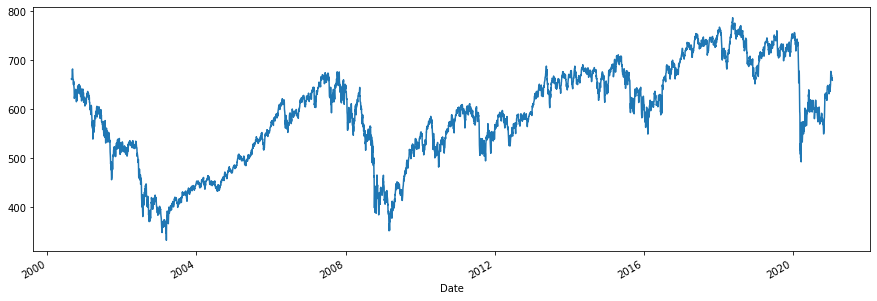

In [142]:
# Plot data based on historical data
plt.figure(figsize=(15, 5))
isf_historic.Close.plot()

In [144]:
# Confirm data matches recent
isf_historic.tail()

,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2021-01-18,661.3,664.00,660.70,661.7,5699837,GBP,London
2021-01-19,665.4,666.50,659.40,661.1,4618993,GBP,London
2021-01-20,662.0,665.00,659.40,664.2,7115075,GBP,London
2021-01-21,667.3,667.54,661.50,661.5,5863569,GBP,London
2021-01-22,660.0,660.40,655.14,659.0,6170250,GBP,London


## ETF information

In [146]:
# Retrieve fundamental financial information
isf_fundamentals = investpy.get_etf_information(ISF, 'United Kingdom', as_json=True)
isf_fundamentals

{'ETF Name': 'iShares Core FTSE 100 UCITS',
 'Prev. Close': 661.5,
 'Todays Range': '655.3 - 660.4',
 'ROI (TTM)': None,
 'Open': 660.0,
 '52 wk Range': '482.25 - 753.65',
 'Dividends (TTM)': 19.79,
 'Volume': 6170250.0,
 'Market Cap': 5630000000.0,
 'Dividend Yield': '2.98%',
 'Average Vol. (3m)': 9167686.0,
 'Total Assets': 41260000000.0,
 'Beta': 1.01,
 '1-Year Change': '- 11.37%',
 'Shares Outstanding': 809522777.0,
 'Asset Class': 'Equity'}

# Indices

## List of indices

In [148]:
# Retrive table of available indices, from CSV stored with library
indices_table = investpy.get_indices()
indices_table[indices_table.country == 'united kingdom']

,country,name,full_name,symbol,currency,class,market
4611,united kingdom,FTSE 100 Minimum Variance,FTSE 100 Minimum Variance,FTUKXMV,GBP,other_indices,global_indices
4612,united kingdom,Stoxx UK 50 Risk 20% RV EUR,Stoxx UK 50 Risk 20% RV EUR,SUKR20EG,EUR,other_indices,global_indices
4613,united kingdom,Stoxx UK 50 Risk 20% RV USD,Stoxx UK 50 Risk 20% RV USD,SUKR20DG,USD,other_indices,global_indices
4614,united kingdom,Stoxx UK 50 Risk 15% RV EUR,Stoxx UK 50 Risk 15% RV EUR,SUKR15EG,EUR,other_indices,global_indices
4615,united kingdom,Stoxx UK 50 Risk 15% RV USD,Stoxx UK 50 Risk 15% RV USD,SUKR15DG,USD,other_indices,global_indices
...,...,...,...,...,...,...,...
4874,united kingdom,FTSE 350 Telecom,FTSE 350 Telecommunications,FTUB6500,GBP,other_indices,world_indices
4875,united kingdom,FTSE 350 Life Insurance,FTSE 350 Life Insurance,FTNMX8570,GBP,primary_sectors,world_indices
4876,united kingdom,FTSE 350 Industrial Transportation,FTSE 350 Industrial Transportation,FTNMX2770,GBP,primary_sectors,world_indices
4877,united kingdom,FTSE 350 Retail,FTSE 350 Retail,FTUB5300,GBP,other_indices,world_indices


In [149]:
# Retrive list of indices (names, not symbols)
indices_list = investpy.get_indices_list()
indices_list[:10]

['S&P Merval',
 'BNY Mellon Argentina ADR TR',
 'BNY Mellon Argentina ADR',
 'MAE Fixed Income',
 'S&P/BYMA Argentina General',
 'S&P Merval Argentina',
 'S&P/BYMA Utilities',
 'S&P/BYMA Real Estate',
 'MSCI Argentina',
 'S&P/BYMA Industrials']

In [150]:
# Retrive indices as dictionary, as alternative to dataframe table
indices_dct = investpy.get_indices_dict()
indices_dct[:2]

[{'country': 'argentina',
  'name': 'S&P Merval',
  'full_name': 'S&P Merval',
  'symbol': 'MERV',
  'currency': 'ARS',
  'class': 'major_indices',
  'market': 'world_indices'},
 {'country': 'argentina',
  'name': 'BNY Mellon Argentina ADR TR',
  'full_name': 'BNY Mellon Argentina ADR Total Return',
  'symbol': 'BKART',
  'currency': 'USD',
  'class': 'additional_indices',
  'market': 'global_indices'}]

In [151]:
# Retrive list of valid countries for indices
indices_countries = investpy.get_index_countries()
indices_countries[:10]

['argentina',
 'australia',
 'austria',
 'bahrain',
 'bangladesh',
 'belgium',
 'bosnia',
 'botswana',
 'brazil',
 'bulgaria']

## Historic indices data

In [153]:
# Extract the name for the FTSE100 index
UKX = next(
    dct['name'] for dct in indices_dct 
    if (dct['symbol'] == 'FTSE') and (dct['country'] == 'united kingdom')
)

In [155]:
# Retrive recent FTSE 100 index data
ftse100_recent = investpy.get_index_recent_data(UKX, 'United Kingdom')
ftse100_recent.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-01-18,6735.71,6741.47,6709.33,6720.65,359827008,GBP
2021-01-19,6720.65,6770.66,6697.67,6712.95,618145024,GBP
2021-01-20,6712.95,6751.81,6697.46,6740.39,687500032,GBP
2021-01-21,6740.39,6776.92,6715.42,6715.42,612553984,GBP
2021-01-22,6715.42,6715.66,6651.71,6695.07,693955008,GBP


In [157]:
# Retrive historic FTSE 100 index data
ftse100_historic = investpy.get_index_historical_data(
    UKX, 'United Kingdom', 
    from_date='01/01/1990', to_date='22/01/2021', 
    as_json=False, order='ascending'
)

<AxesSubplot:xlabel='Date'>

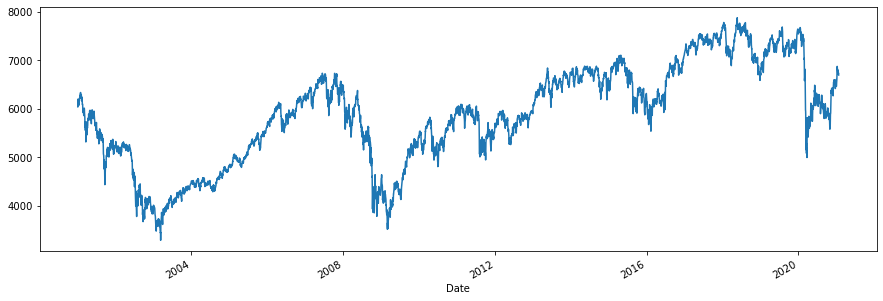

In [158]:
# Plot data based on historical data
plt.figure(figsize=(15, 5))
ftse100_historic.Close.plot()

# Technical
The technical functions can be applied to any product type: stock, ETF, index etc. The name used is the name of the product unless it is a stock, in which case the name is the symbol.

## Technical indicators

In [159]:
# Retrieve up to date technical indicators for ISF etf
isf_tech = investpy.technical_indicators(ISF, 'United Kingdom', 'etf')
isf_tech

,technical_indicator,value,signal
0,RSI(14),53.8240,neutral
1,"STOCH(9,6)",33.8990,sell
2,STOCHRSI(14),0.0000,oversold
3,"MACD(12,26)",5.0900,buy
4,ADX(14),24.7080,sell
5,Williams %R,-56.1570,sell
6,CCI(14),-84.2076,sell
7,ATR(14),8.4726,less_volatility
8,Highs/Lows(14),-1.6099,sell
9,Ultimate Oscillator,52.0890,buy


In [161]:
# Retrive up to date technical indicators for NXT stock
nxt_tech = investpy.technical_indicators('NXT', 'United Kingdom', 'stock')
nxt_tech

,technical_indicator,value,signal
0,RSI(14),62.1160,buy
1,"STOCH(9,6)",93.1190,overbought
2,STOCHRSI(14),0.0000,oversold
3,"MACD(12,26)",297.7000,buy
4,ADX(14),35.2320,buy
5,Williams %R,-13.8320,overbought
6,CCI(14),-105.3804,sell
7,ATR(14),377.7929,high_volatility
8,Highs/Lows(14),0.0000,neutral
9,Ultimate Oscillator,78.7780,overbought


## Moving Averages

In [163]:
# Retrive moving average data for ISF etf
isf_ma = investpy.moving_averages(ISF, 'United Kingdom', 'etf')
isf_ma

,period,sma_value,sma_signal,ema_value,ema_signal
0,5,661.50,sell,661.68,sell
1,10,663.90,sell,661.36,sell
2,20,658.76,buy,658.61,buy
3,50,644.44,buy,642.05,buy
4,100,612.82,buy,625.57,buy
5,200,605.03,buy,627.94,buy


## Pivot points 
Pivot points are calculated values for pivot, support and resistance lines, which frame the next days trading based on the high, low, close etc of the previous day. There are a few different methods to calculate the pivots points.

In [164]:
# Retrieve the pivot points based on previous day trading, for ISF etf
isf_pivots = investpy.pivot_points(ISF, 'United Kingdom', 'etf')
isf_pivots

,name,s3,s2,s1,pivot_points,r1,r2,r3
0,Classic,653.43,657.47,659.48,663.51,665.52,669.55,671.56
1,Fibonacci,657.47,659.77,661.20,663.51,665.82,667.25,669.55
2,Camarilla,659.84,660.39,660.95,663.51,662.05,662.61,663.16
3,Woodie's,652.43,656.97,658.48,663.01,664.52,669.05,670.56
4,DeMark's,NaN,NaN,658.48,663.01,664.52,NaN,NaN


# Search
This gives us the ability to bypass the static stock lists and directly search investing.com. The best way to do this would be to use the ISIN as the search term, ensuring the exact stock is found. This is useful in situations where the stock is new, as the provided static lists are very thorough. 

The downside is there are only three methods which can be used on the search results:
- Recent
- Historic
- Summary information

In [165]:
# Search for a quote using investing.com search, in this case using ISIN to search Yellow Cake stock
yca_search = investpy.search_quotes('JE00BF50RG45', n_results=1)

In [168]:
# Assume first result is correct, and extract YCA stock object
YCA = yca_search[0]

In [170]:
# Retrive all possible information from search result
yca_recent = YCA.retrieve_recent_data()
yca_historic = YCA.retrieve_historical_data(from_date='01/01/2020', to_date='01/01/2021')
yca_info = YCA.retrieve_information()

In [171]:
yca_info

{'Prev. Close': 226,
 'Todays Range': '217.5 - 228',
 'Revenue': 889020,
 'Open': 228,
 '52 wk Range': '136 - 258.1',
 'EPS': 0.31,
 'Volume': 634109,
 'Market Cap': 184930000,
 'Dividend (Yield)': 'N/A (N/A)',
 'Average Vol. (3m)': 479874,
 'P/E Ratio': 7.08,
 'Beta': None,
 '1-Year Change': '12.82%',
 'Shares Outstanding': 84059331,
 'Next Earnings Date': None}

<AxesSubplot:xlabel='Date'>

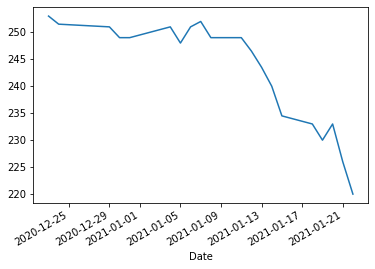

In [172]:
yca_recent.Close.plot()

<AxesSubplot:xlabel='Date'>

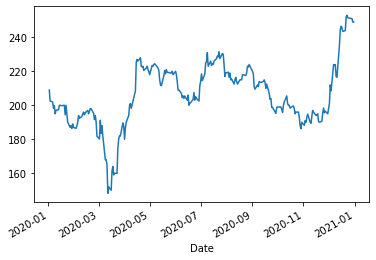

In [173]:
yca_historic.Close.plot()

# News
The news feature provides a list of significant financial events throughout the year, providing the country it will impact, the importance and expected impact on market.

In [176]:
# Retrieve economic calcendar (given from and to dates)
eco_calendar = investpy.economic_calendar(from_date='01/01/2021', to_date='01/02/2021')

In [178]:
eco_calendar.tail(20)

,id,date,time,zone,currency,importance,event,actual,forecast,previous
281,420702,06/01/2021,07:00,norway,NOK,low,Credit Indicator (YoY) (Nov),4.7%,None,4.5%
282,420703,06/01/2021,07:15,south africa,ZAR,low,South Africa Standard Bank PMI (Dec),50.2,None,50.3
283,420704,06/01/2021,07:45,france,EUR,low,French Consumer Confidence (Dec),95,91,89
284,421426,06/01/2021,07:45,france,EUR,low,French CPI (YoY),0.0%,0.2%,0.2%
285,421172,06/01/2021,07:45,france,EUR,medium,French CPI (MoM) (Dec),0.2%,0.2%,0.2%
286,421173,06/01/2021,07:45,france,EUR,low,French HICP (YoY) (Dec),0.0%,0.2%,0.2%
287,421174,06/01/2021,07:45,france,EUR,medium,French HICP (MoM) (Dec),0.2%,0.2%,0.2%
288,420705,06/01/2021,08:00,czech republic,CZK,low,Trade Balance NRA (Nov),32.2B,29.4B,32.2B
289,420875,06/01/2021,08:00,hungary,HUF,low,Gross Wages (YoY) (Oct),8.8%,None,8.8%
290,421506,06/01/2021,08:00,hungary,HUF,low,PPI (YoY) (Nov),5.5%,None,5.9%
